# Hierarchical Clustering Assignment

In [1]:
# Maths
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# ML
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

# SQL
from sqlalchemy import create_engine

# Ignore Warn
import warnings
warnings.filterwarnings('ignore')

1. Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [4]:
# Standardizing
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)


In [5]:
methods = ['average', 'complete', 'ward']

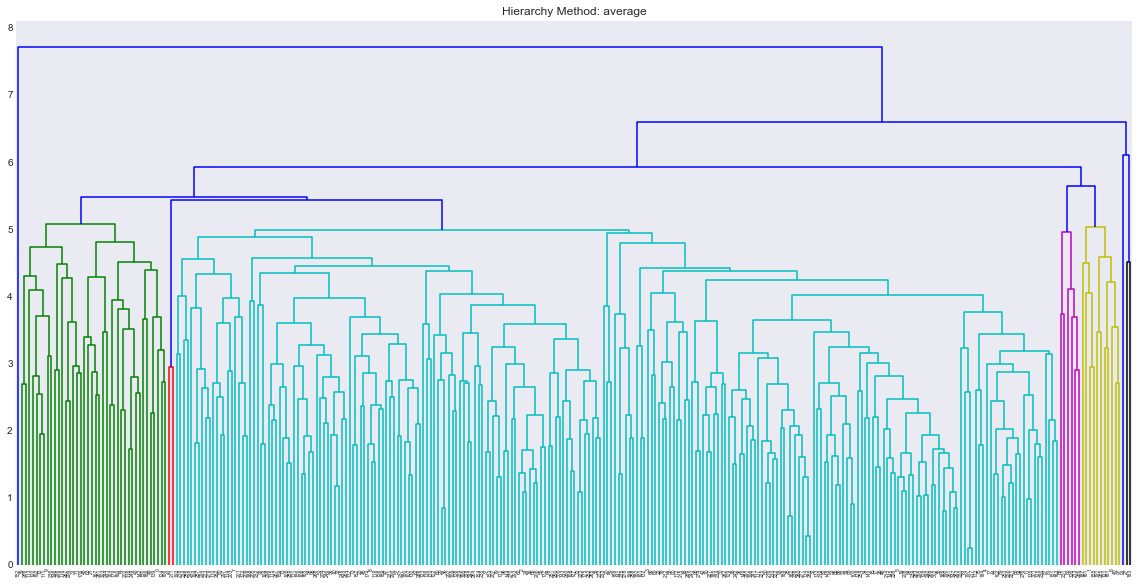

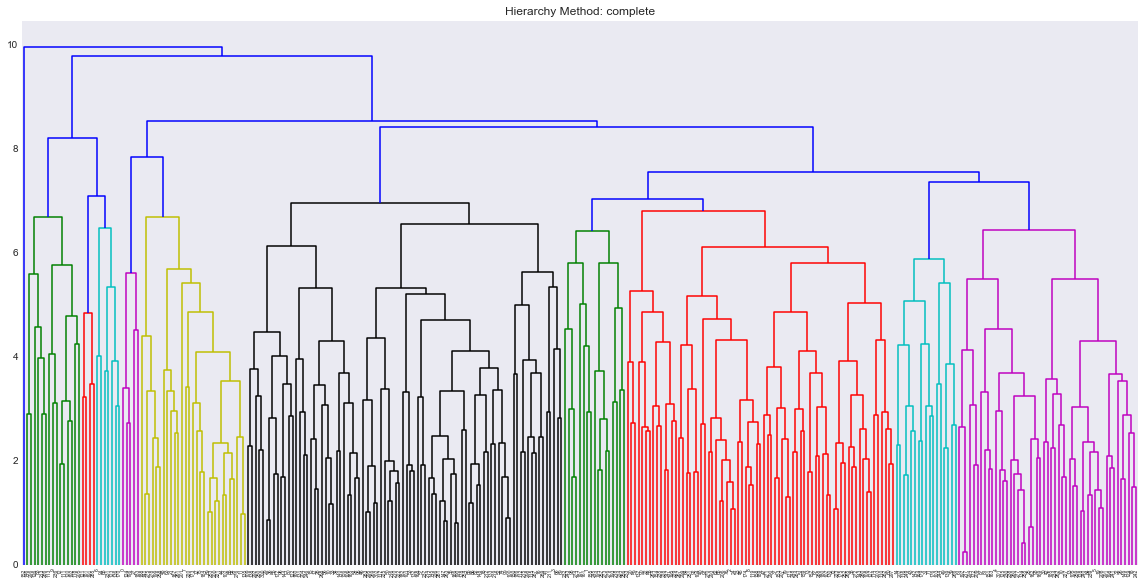

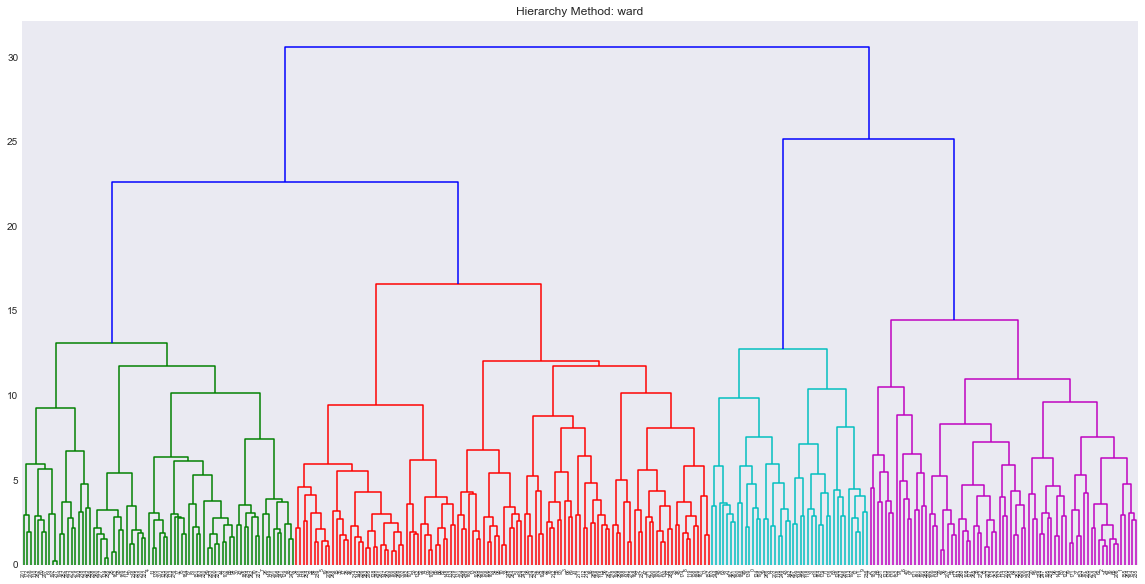

In [6]:
for i in range(3):
    plt.style.use('seaborn-dark')
    plt.figure(figsize=(20,10))
    dendrogram(linkage(X_std, method=methods[i]))
    plt.title(f'Hierarchy Method: {methods[i]}')
    plt.show()
    print('\n')
    

The most reasonable method here looks to be Ward. 

___
2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [9]:
affinity = ['euclidean','manhattan','cosine']

for i in range(len(methods)):
    try:
        for j in range(len(affinity)):
            results = AgglomerativeClustering(linkage=methods[i],
                                              affinity=affinity[j],
                                              n_clusters=2                     
                                             ).fit_predict(X_std)
            silhouette = metrics.silhouette_score(X_std,results, metric='euclidean')
            ARI = metrics.adjusted_rand_score(y,results)
            print(('_'*30) + f'\nHierarchy Pair: {affinity[j]}, {methods[i]}\n')
            print(f'Silhouette Score: {silhouette}')
            print(f'ARI Score: {ARI}')
    except ValueError:
        break

______________________________
Hierarchy Pair: euclidean, average

Silhouette Score: 0.34836188921330785
ARI Score: -0.0010061512759301477
______________________________
Hierarchy Pair: manhattan, average

Silhouette Score: 0.34836188921330785
ARI Score: -0.0010061512759301477
______________________________
Hierarchy Pair: cosine, average

Silhouette Score: 0.14837359969689895
ARI Score: 0.2940490133353465
______________________________
Hierarchy Pair: euclidean, complete

Silhouette Score: 0.34836188921330785
ARI Score: -0.0010061512759301477
______________________________
Hierarchy Pair: manhattan, complete

Silhouette Score: 0.13346005885370774
ARI Score: 0.3707065281378112
______________________________
Hierarchy Pair: cosine, complete

Silhouette Score: 0.11730765444448985
ARI Score: 0.21394030618551016
______________________________
Hierarchy Pair: euclidean, ward

Silhouette Score: 0.1387197366557222
ARI Score: 0.146129913123814


For hierarchical, the pairing of Manhattan and complete seems to perform the best. Compared to the 2-cluster K-means, the K-means outperforms in both with .43 ARI and .17 Silhouette.